## 417. Pacific Atlantic Water Flow
There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.

The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).

The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. Water can flow from any cell adjacent to an ocean into the ocean.

Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.

 

Example 1:

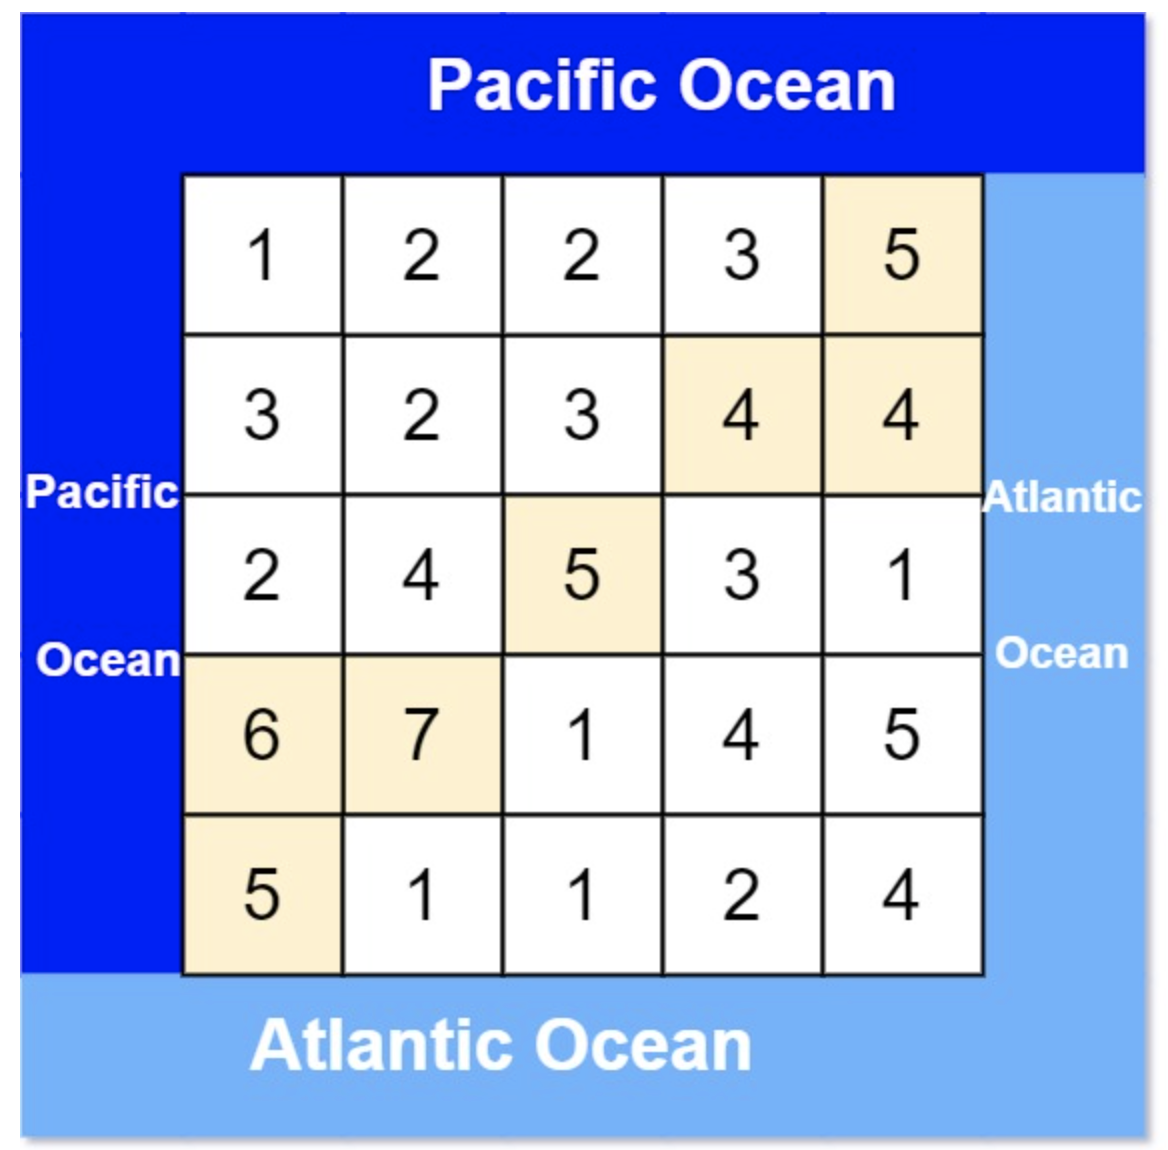

Input: heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]

Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]

Example 2:

Input: heights = [[2,1],[1,2]]

Output: [[0,0],[0,1],[1,0],[1,1]]
 

Constraints:

m == heights.length
n == heights[r].length
1 <= m, n <= 200
0 <= heights[r][c] <= 105

In [1]:
def pacificAtlantic(heights):
        
    m = len(heights)
    n = len(heights[0])
    pacfc_touch = [[False for _ in range(n)] for _ in range(m)]
    atlntc_touch = [[False for _ in range(n)] for _ in range(m)]

    for i in range(m):
        traverse(i, 0, pacfc_touch, heights)
        traverse(i, n-1, atlntc_touch, heights)
    for i in range(n):
        traverse(0, i, pacfc_touch, heights)
        traverse(m-1, i, atlntc_touch, heights)

    result = []
    for i in range(m):
        for j in range(n):
            if pacfc_touch[i][j] and atlntc_touch[i][j]:
                result.append([i,j])
    return result

def traverse(row, col, visited, matrix):
    if visited[row][col]:
        return
    visited[row][col] = True
    
    ngbrs = getNeighbours(row, col, matrix)
    
    for r, c in ngbrs:
        if visited[r][c]:
            continue
        if matrix[r][c] < matrix[row][col]:
            continue
        traverse(r,c,visited, matrix)

def getNeighbours(row, col, matrix):
    ngbrs = []
    if row > 0:
        ngbrs.append((row-1, col))
    if row < len(matrix)-1:
         ngbrs.append((row+1, col))
    if col > 0:
         ngbrs.append((row, col-1))
    if col < len(matrix[0])-1:
         ngbrs.append((row, col+1))
    return ngbrs

In [2]:
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
pacificAtlantic(heights)

[[0, 4], [1, 3], [1, 4], [2, 2], [3, 0], [3, 1], [4, 0]]

In [3]:
heights = [[2,1],[1,2]]
pacificAtlantic(heights)

[[0, 0], [0, 1], [1, 0], [1, 1]]